***Carga de las bibliotecas***

In [ ]:
import numpy as np 
import pandas as pd
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

***Carga del dataset***

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ESCOM/8vo Semestre/Data Mining/Extraordinario/drug200.csv")
df[0:50]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


***PreProcesamiento de los datos***

In [ ]:
x = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values

#Preprocesamiento del sexo
sex = preprocessing.LabelEncoder()
sex.fit(['F','M'])
x[:,1] = sex.transform(x[:,1]) 

#Preprocesamiento de Presión de la sangre
BP = preprocessing.LabelEncoder()
BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
x[:,2] = BP.transform(x[:,2])

#Preprocesamiento del nivel de colesteról
Chol = preprocessing.LabelEncoder()
Chol.fit([ 'NORMAL', 'HIGH'])
x[:,3] = Chol.transform(x[:,3]) 

x[0:10]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043],
       [22, 0, 2, 0, 8.607000000000001],
       [49, 0, 2, 0, 16.275],
       [41, 1, 1, 0, 11.037],
       [60, 1, 2, 0, 15.171],
       [43, 1, 1, 1, 19.368]], dtype=object)

***Visualización de la variable objetivo***

In [ ]:
y = df["Drug"]
y[0:50]

0     drugY
1     drugC
2     drugC
3     drugX
4     drugY
5     drugX
6     drugY
7     drugC
8     drugY
9     drugY
10    drugC
11    drugY
12    drugY
13    drugY
14    drugX
15    drugY
16    drugX
17    drugA
18    drugC
19    drugY
20    drugY
21    drugY
22    drugY
23    drugY
24    drugY
25    drugY
26    drugY
27    drugX
28    drugY
29    drugY
30    drugX
31    drugB
32    drugX
33    drugY
34    drugX
35    drugX
36    drugA
37    drugX
38    drugX
39    drugX
40    drugY
41    drugB
42    drugY
43    drugX
44    drugX
45    drugX
46    drugA
47    drugC
48    drugY
49    drugY
Name: Drug, dtype: object

***Configuración del árbol de decisión***

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

***Modelado***

In [ ]:
dt = DecisionTreeClassifier(criterion='gini')
dt

DecisionTreeClassifier()

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

***Predicción***

In [ ]:
pt = dt.predict(x_test)
print(pt[0:5])
print(y_test[0:20])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
82     drugC
183    drugY
46     drugA
70     drugB
100    drugA
179    drugY
83     drugA
25     drugY
190    drugY
159    drugX
173    drugY
95     drugX
3      drugX
41     drugB
58     drugX
Name: Drug, dtype: object


***Medición de la precisión***

In [ ]:
print("Accuracy of the decision tree: ", metrics.accuracy_score(y_test,pt))

Accuracy of the decision tree:  0.9833333333333333


***Visualización del árbol***

[Text(523.125, 733.86, 'X[4] <= 14.615\ngini = 0.676\nsamples = 140\nvalue = [16, 11, 11, 33, 69]'),
 Text(418.5, 570.78, 'X[2] <= 0.5\ngini = 0.685\nsamples = 71\nvalue = [16, 11, 11, 33, 0]'),
 Text(209.25, 407.70000000000005, 'X[0] <= 50.5\ngini = 0.483\nsamples = 27\nvalue = [16, 11, 0, 0, 0]'),
 Text(104.625, 244.62, 'gini = 0.0\nsamples = 16\nvalue = [16, 0, 0, 0, 0]'),
 Text(313.875, 244.62, 'gini = 0.0\nsamples = 11\nvalue = [0, 11, 0, 0, 0]'),
 Text(627.75, 407.70000000000005, 'X[3] <= 0.5\ngini = 0.375\nsamples = 44\nvalue = [0, 0, 11, 33, 0]'),
 Text(523.125, 244.62, 'X[2] <= 1.5\ngini = 0.499\nsamples = 21\nvalue = [0, 0, 11, 10, 0]'),
 Text(418.5, 81.54000000000008, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]'),
 Text(627.75, 81.54000000000008, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 0, 10, 0]'),
 Text(732.375, 244.62, 'gini = 0.0\nsamples = 23\nvalue = [0, 0, 0, 23, 0]'),
 Text(627.75, 570.78, 'gini = 0.0\nsamples = 69\nvalue = [0, 0, 0, 0, 69]')]

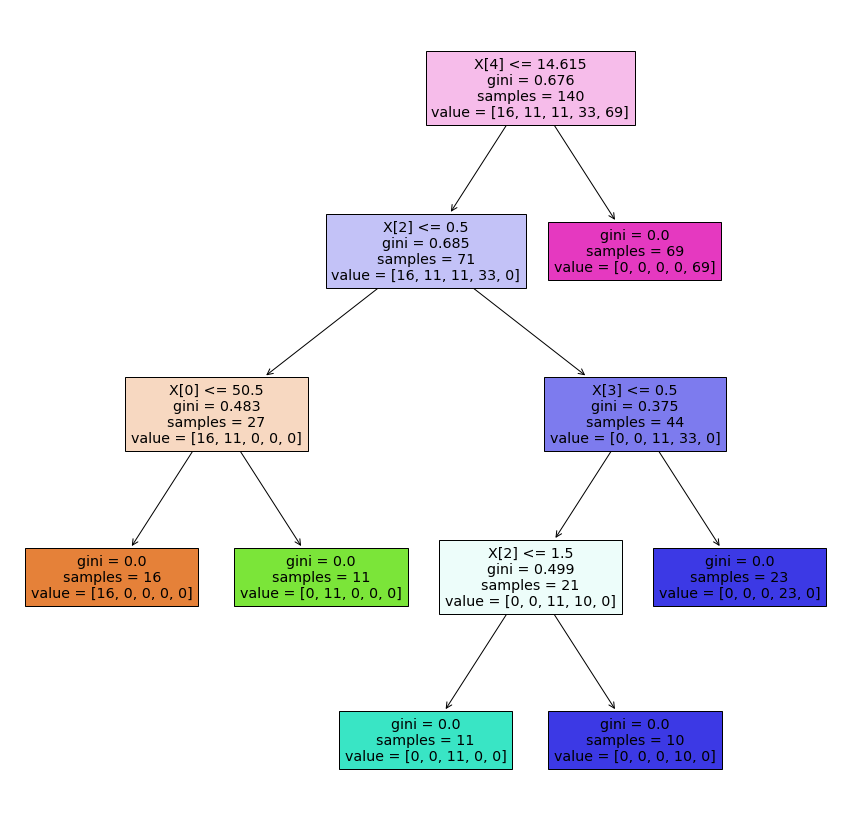

In [ ]:
plt.figure(figsize=(15,15))
tree.plot_tree(dt,filled=True)